In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My\ Drive/data2

/content/drive/My Drive/data2


In [40]:
ls

a.jpg  train/  val/


In [0]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [0]:
num_classes=2

In [0]:
resnet_weights_path='imagenet'

In [0]:
my_new_model=Sequential()
my_new_model.add(ResNet50(include_top=False,pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

In [0]:
#Say not to train first layer(Resnet) model. It is already trained
my_new_model.layers[0].trainable=False

In [0]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [0]:
image_size=224

In [0]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [96]:
train_generator=data_generator.flow_from_directory('train', target_size=(image_size, image_size), batch_size=1, class_mode='categorical')

Found 72 images belonging to 2 classes.


In [108]:
validation_generator=data_generator.flow_from_directory('val',target_size=(image_size,image_size), batch_size=20, class_mode='categorical')

Found 20 images belonging to 2 classes.


In [98]:
my_new_model.fit_generator(train_generator, steps_per_epoch=72,validation_data=validation_generator,validation_steps=1)

72/72 [==============================] - 15s 210ms/step - loss: 0.4098 - accuracy: 0.9306 - val_loss: 0.5978 - val_accuracy: 0.9000


In [99]:
my_new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
def read_and_prep_images(image_paths, img_height=image_size, img_width=image_size):
  imgs=[load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
  img_array=np.array([img_to_array(img) for img in imgs])
  output=preprocess_input(img_array)
  return(output)

In [0]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [0]:
from IPython.display import Image, display

In [0]:
import numpy as np

In [0]:
img_paths=['a.jpg']

In [0]:
test_data=read_and_prep_images(img_paths)

In [0]:
preds=my_new_model.predict(test_data)

In [107]:
preds

array([[4.408157e-13, 1.000000e+00]], dtype=float32)

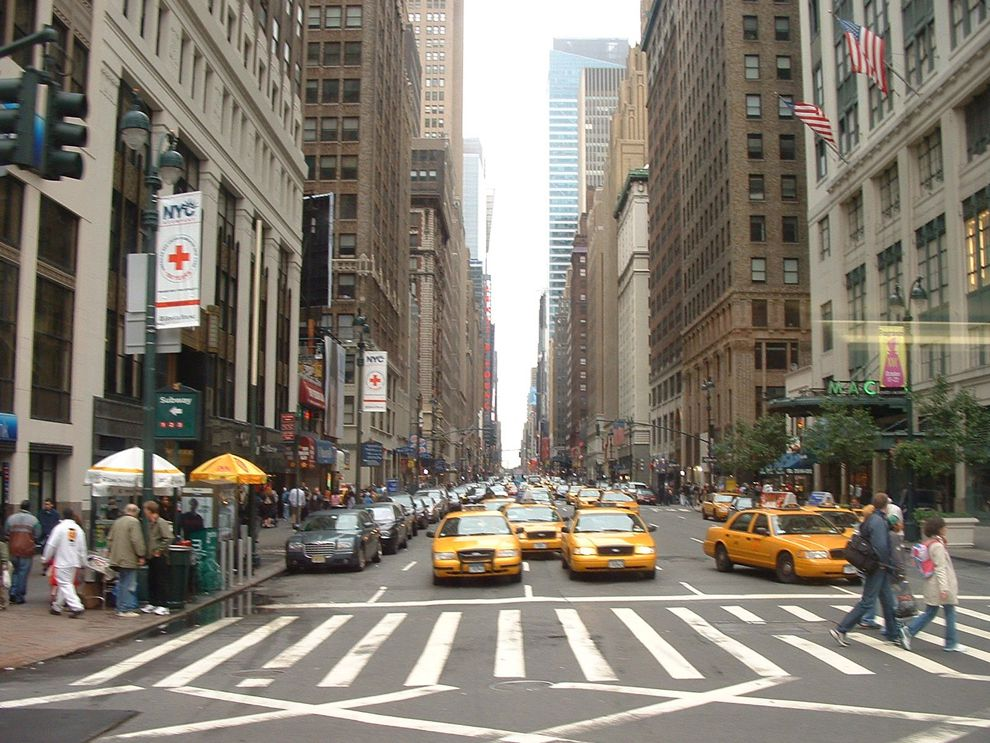

In [86]:
for i, img_path in enumerate(img_paths):
  display(Image(img_path))